In [1]:
import json
import pandas as pd
import tweepy

In [2]:
df_content_rating = pd.read_csv("data/banijay_op1data_content_ratings.csv", compression='zip')
df_content = pd.read_csv('data/banijay_op1data_content_processed.csv')

In [3]:
with open('data/banijay_op1data_twitter_raw.json', 'rb') as f:
    twitter_json = json.load(f)

In [4]:
df_op1_twitter = pd.json_normalize(twitter_json)
df_op1_twitter.head(10)

,referenced_tweets,possibly_sensitive,lang,text,edit_history_tweet_ids,author_id,created_at,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,author.id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,author.public_metrics.listed_count,author.name,author.username
0,"[{'type': 'replied_to', 'id': '160025955556878...",False,nl,Lees hier het gesprek terug: #Op1 \n\nhttps://...,[1600440065410453509],17022916,2022-12-07T10:40:20.000Z,1600440065410453509,0,8,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
1,"[{'type': 'replied_to', 'id': '160025483213200...",False,nl,Lees hier het gesprek terug: #Op1 \n\nhttps://...,[1600440000520372225],17022916,2022-12-07T10:40:05.000Z,1600440000520372225,0,0,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
2,"[{'type': 'replied_to', 'id': '160025268126773...",False,nl,@mariettehamer Lees hier het gesprek terug: #O...,[1600431542878314497],17022916,2022-12-07T10:06:29.000Z,1600431542878314497,0,1,0,0,17022916,337078,1432,38840,2362,Op1,op1npo
3,"[{'type': 'replied_to', 'id': '160025066981831...",False,nl,@fleurjongepier Lees hier het gesprek terug: #...,[1600431528479178754],17022916,2022-12-07T10:06:25.000Z,1600431528479178754,0,0,2,0,17022916,337078,1432,38840,2362,Op1,op1npo
4,"[{'type': 'replied_to', 'id': '160024856209630...",False,nl,@robdewijk Lees hier het gesprek terug: #Op1 \...,[1600426335301767169],17022916,2022-12-07T09:45:47.000Z,1600426335301767169,1,0,1,0,17022916,337078,1432,38840,2362,Op1,op1npo
5,NaN,False,nl,Terugkijken: Gordon over zijn nieuwe programma...,[1600384865366511617],17022916,2022-12-07T07:01:00.000Z,1600384865366511617,0,27,3,1,17022916,337078,1432,38840,2362,Op1,op1npo
6,NaN,False,nl,Terugkijken: Sander de Kramer en Redouan El Ya...,[1600379832163913728],17022916,2022-12-07T06:41:00.000Z,1600379832163913728,0,0,2,0,17022916,337078,1432,38840,2362,Op1,op1npo
7,NaN,False,nl,"Terugkijken: Mariëtte Hamer, Karin Bosman en F...",[1600374798860812289],17022916,2022-12-07T06:21:00.000Z,1600374798860812289,5,6,4,0,17022916,337078,1432,38840,2362,Op1,op1npo
8,NaN,False,nl,Kijk hier de hele uitzending van dinsdagavond ...,[1600369765784211457],17022916,2022-12-07T06:01:00.000Z,1600369765784211457,1,3,1,0,17022916,337078,1432,38840,2362,Op1,op1npo
9,NaN,False,nl,Ruim een jaar geleden verruilde Gordon Nederla...,[1600259555568783361],17022916,2022-12-06T22:43:04.000Z,1600259555568783361,10,169,82,40,17022916,337078,1432,38840,2362,Op1,op1npo


In [5]:
df_op1_twitter["created_at"] = pd.to_datetime(df_op1_twitter["created_at"]).dt.tz_localize(None)
df_content["date"] = pd.to_datetime(df_content["date"])

In [6]:
df_op1_twitter_non_referenced = df_op1_twitter[df_op1_twitter['referenced_tweets'].isnull()]

In [7]:
df_content = df_content[['date', 'content_id']]
df_content.drop_duplicates(['date', 'content_id'], keep='first', inplace=True)
df_op1_twitter_non_referenced['created_at'] = df_op1_twitter_non_referenced['created_at'].dt.date.astype('datetime64')
df_groupedby_date = df_op1_twitter_non_referenced.groupby('created_at').mean()

C:\Users\mened\AppData\Local\Temp\ipykernel_31156\3859274224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_op1_twitter_non_referenced['created_at'] = df_op1_twitter_non_referenced['created_at'].dt.date.astype('datetime64')


In [8]:
df_content.head(10)

,date,content_id
0,2021-01-02,WON02197428
4,2022-01-02,WON02290378
9,2021-01-03,WON02205329
13,2022-01-03,WON02297320
16,2020-01-04,WON02103289
21,2021-01-04,WON02213946
23,2022-01-04,WON02305545
27,2020-01-05,WON02113058
31,2020-01-06,WON02123548
35,2021-01-06,WON02228859


In [9]:
# Calculating the engagement rate
df_groupedby_date['Engagement_rate'] = ((df_groupedby_date['public_metrics.retweet_count'] +
                                         df_groupedby_date['public_metrics.like_count'] +
                                         df_groupedby_date['public_metrics.reply_count'] +
                                         df_groupedby_date['public_metrics.quote_count']) / 
                                         df_groupedby_date['author.public_metrics.followers_count']) * 100

In [10]:
lookup = pd.merge(df_content, df_groupedby_date, left_on='date', right_on='created_at')

In [11]:
lookup['Engagement_rate'].sort_values(ascending=False)

255    0.251005
12     0.152256
161    0.134623
225    0.108799
545    0.108745
         ...   
110    0.000636
81     0.000534
48     0.000519
186    0.000371
23     0.000297
Name: Engagement_rate, Length: 670, dtype: float64

C:\Users\mened\AppData\Local\Temp\ipykernel_31156\1558223177.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(twitter_rating_top_5['content_id'], rotation=25)


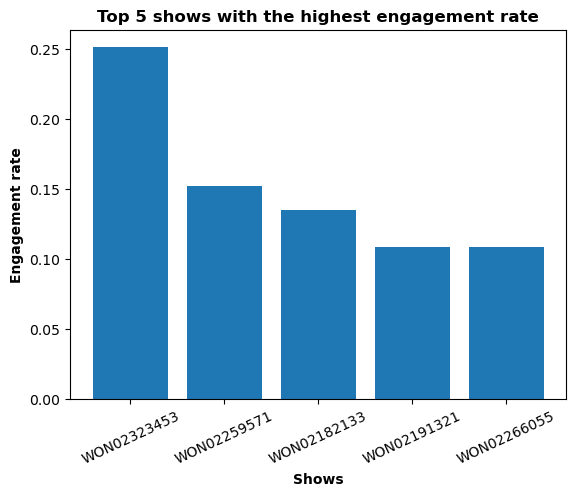

In [12]:
import matplotlib.pyplot as plt

twitter_rating = lookup.groupby('content_id', as_index=False)['Engagement_rate'].mean()
twitter_rating_top_5 = twitter_rating.sort_values('Engagement_rate', ascending=False).head(5)
fig, ax = plt.subplots()
ax.bar(twitter_rating_top_5['content_id'], twitter_rating_top_5['Engagement_rate'])
ax.set_xticklabels(twitter_rating_top_5['content_id'], rotation=25)
plt.title('Top 5 shows with the highest engagement rate', fontdict={'fontweight':'bold'})
ax.set_xlabel('Shows', fontdict={'fontweight':'bold'})
ax.set_ylabel('Engagement rate', fontdict={'fontweight':'bold'})
plt.savefig('Visualizations/Top_5_shows_with_the_highest_engagement_rate.png', dpi=300)
plt.show()

In [13]:
df_content_rating['date'] = pd.to_datetime(df_content_rating['date'])
merged = pd.merge(df_content_rating, lookup, on=['date', 'content_id'])

In [15]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

# Interactive scatterplot for engagement rate and rating of shows
content_id = merged.groupby('content_id', as_index=False)[['Engagement_rate', 'Kdh000']].mean()
source = ColumnDataSource(data=content_id)
TOOLTIPS = [('Show', '@content_id'), ('Rating', '@Kdh000'), ('Engagement rate', '@Engagement_rate')]
fig = figure(x_axis_label='Engagement rate', y_axis_label='Rating', tooltips=TOOLTIPS)
fig.circle(x='Engagement_rate', y='Kdh000', source=source)
output_file(filename='Scatterplot_of_Engagement_Rate_and_Rating.html')
show(fig)

C:\Users\mened\AppData\Local\Temp\ipykernel_31156\4046411123.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=content_id['Engagement_rate'], y=content_id['Kdh000'], palette='YlGnBu')


Text(0.5, 0, 'Engagement rate')

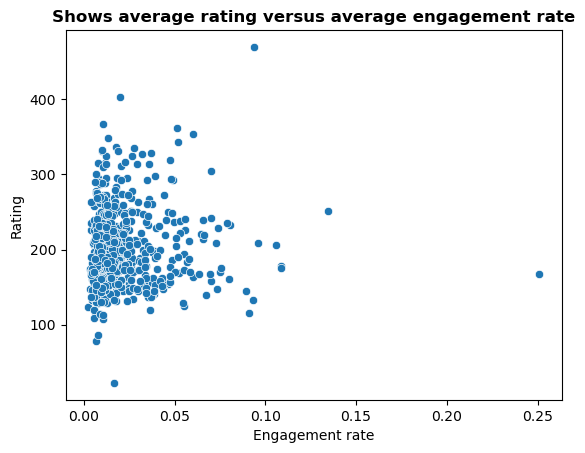

In [16]:
import seaborn as sns

sns.scatterplot(x=content_id['Engagement_rate'], y=content_id['Kdh000'], palette='YlGnBu')
plt.title('Shows average rating versus average engagement rate', fontdict={'fontweight':'bold'})
plt.ylabel('Rating')
plt.xlabel('Engagement rate')

In [42]:
correlation_coefficient = content_id['Engagement_rate'].corr(content_id['Kdh000'])
print("The correlation coefficient between the engagement rate and rating:", correlation_coefficient)

The correlation coefficient between the engagement rate and rating: 0.06616954498067974


In [44]:
merged.to_csv('data/banijay_op1data_content_ratings_twitter.csv', compression='zip')